<h1><font size=12>
Weather Derivates </h1>
<h1> Precipitation Bogota Exploration - El Dorado Airport<br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
31 Julio 2018 


In [1]:
# Configure path to read txts.

path = '../datasets/ideamBogota/'

# Download the update dataset.
import os
if not os.path.exists('../datasets/soi.dat'):
    ! wget https://crudata.uea.ac.uk/cru/data/soi/soi.dat -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Load One Year Data

In [2]:
from io import StringIO

# """Determine whether a year is a leap year."""
def isleapyear(year):
    if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
        return True
    return False

# Read only one year.

def loadYear(year):
    year=str(year)
    
    filedata =  open(path+ year +'.txt', 'r') 
    
    # Create a dataframe from the year's txt.
    
    columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    precipitationYear =pd.read_csv(StringIO('\n'.join(' '.join(l.split()) for l in filedata)),sep=' ',header=None, names=columnNames,skiprows=lambda x: x in list(range(0,3)) , skipfooter=4  )
    
    # Sort data to solve problem of 28 days of Feb.
    
    for i in range(28,30):
        for j in reversed(range(1,12)):
            precipitationYear.iloc[i,j]= precipitationYear.iloc[i,j-1]
        
        
        # Fix leap years. 
        
        if isleapyear(int(year)) and i == 28:
            count = 1
        else:
            precipitationYear.iloc[i,1]= np.nan 
            
    
    # Fix problem related to months with 31 days.
    
    precipitationYear.iloc[30,11] = precipitationYear.iloc[30,6]
    precipitationYear.iloc[30,9]  = precipitationYear.iloc[30,5]
    precipitationYear.iloc[30,7] = precipitationYear.iloc[30,4]
    precipitationYear.iloc[30,6] = precipitationYear.iloc[30,3]
    precipitationYear.iloc[30,4] = precipitationYear.iloc[30,2]
    precipitationYear.iloc[30,2] = precipitationYear.iloc[30,1]
    
    for i in [1,3,5,8,10]:
        precipitationYear.iloc[30,i] = np.nan
    
    return precipitationYear


In [3]:
# Show a year data example.
nYear = 2004
testYear =loadYear(nYear)
testYear

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,0.0,0.0,1.8,0.4,1.7,1.5,1.0,0.0,2.6,0.3,0.0,0.0
2,0.0,0.0,0.0,10.8,8.1,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,7.1,18.4,3.3,0.1,0.2,0.0,0.0,0.0,0.0
4,0.0,0.0,0.2,0.0,1.0,2.8,0.0,0.0,6.5,0.0,1.5,0.0
5,2.3,0.0,0.6,0.0,6.2,3.1,2.1,0.3,0.0,4.8,6.2,0.0
6,8.0,0.0,0.0,0.0,0.0,8.1,0.0,0.0,0.0,30.5,13.9,1.0
7,4.0,0.1,0.0,0.0,0.3,0.0,3.8,0.3,4.7,1.8,23.2,0.1
8,1.5,5.1,0.0,1.0,6.8,5.9,8.0,0.7,0.9,24.5,0.0,0.0
9,0.0,0.0,0.0,0.3,4.4,0.3,0.0,0.0,12.4,0.0,0.5,11.8
10,0.0,18.8,0.0,5.3,0.4,0.2,0.0,0.3,2.0,0.1,0.3,0.0


In [4]:
# Convert one year data frame to timeseries.

def convertOneYearToSeries(dataFrameYear,nYear):
    dataFrameYearT = dataFrameYear.T
    dates = pd.date_range(str(nYear)+'-01-01', end = str(nYear)+'-12-31' , freq='D')
    
    dataFrameYearAllTime = dataFrameYearT.stack()
    
    dataFrameYearAllTime.index = dates
    
    return dataFrameYearAllTime

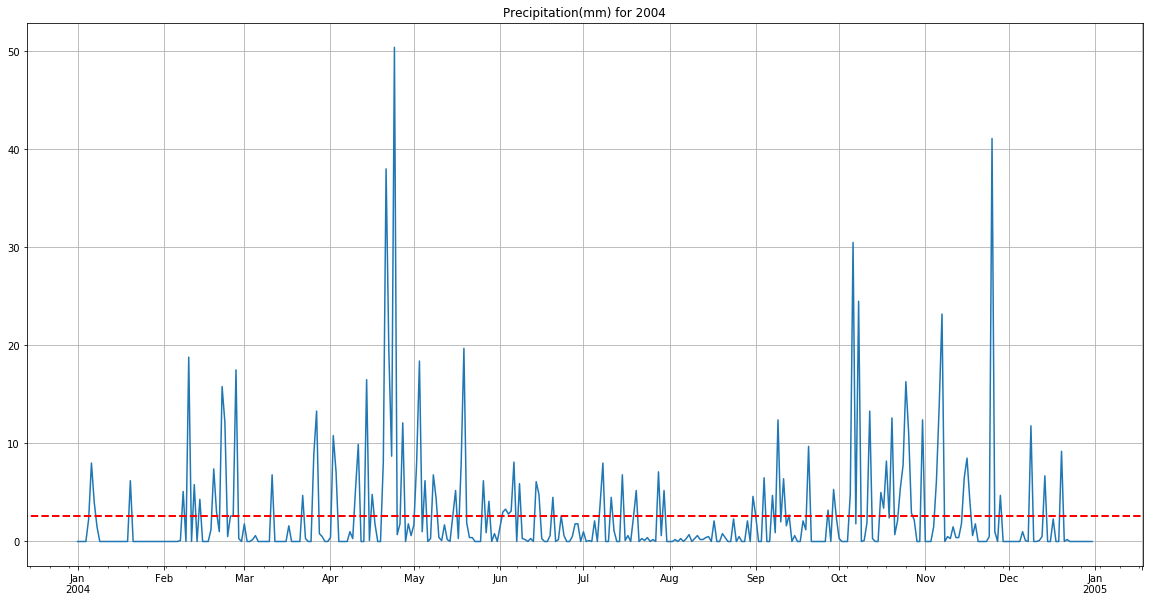

In [5]:
# Plot data from one year. 

timeYear = convertOneYearToSeries(testYear,nYear)
meanTimeYear = timeYear.mean()
ax = timeYear.plot(title='Precipitation(mm) for '+str(nYear),figsize=(20,10),grid=True)
ax.axhline(y=meanTimeYear, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)

In [6]:
timeYear

2004-01-01     0.0
2004-01-02     0.0
2004-01-03     0.0
2004-01-04     0.0
2004-01-05     2.3
2004-01-06     8.0
2004-01-07     4.0
2004-01-08     1.5
2004-01-09     0.0
2004-01-10     0.0
2004-01-11     0.0
2004-01-12     0.0
2004-01-13     0.0
2004-01-14     0.0
2004-01-15     0.0
2004-01-16     0.0
2004-01-17     0.0
2004-01-18     0.0
2004-01-19     0.0
2004-01-20     6.2
2004-01-21     0.0
2004-01-22     0.0
2004-01-23     0.0
2004-01-24     0.0
2004-01-25     0.0
2004-01-26     0.0
2004-01-27     0.0
2004-01-28     0.0
2004-01-29     0.0
2004-01-30     0.0
              ... 
2004-12-02     0.0
2004-12-03     0.0
2004-12-04     0.0
2004-12-05     0.0
2004-12-06     1.0
2004-12-07     0.1
2004-12-08     0.0
2004-12-09    11.8
2004-12-10     0.0
2004-12-11     0.0
2004-12-12     0.1
2004-12-13     0.5
2004-12-14     6.7
2004-12-15     0.0
2004-12-16     0.0
2004-12-17     2.3
2004-12-18     0.0
2004-12-19     0.0
2004-12-20     9.2
2004-12-21     0.0
2004-12-22     0.2
2004-12-23  

# Load history data

In [7]:
# Concatenate all time series between a years range.

def concatYearsPrecipitation(startYear,endYear):
    
    precipitationAllTime = loadYear(startYear)
    precipitationAllTime = convertOneYearToSeries(precipitationAllTime,startYear)
    
    for i in range(startYear+1,endYear+1):
        tempPrecipitation=loadYear(i)
        tempPrecipitation= convertOneYearToSeries(tempPrecipitation,i)
        
        precipitationAllTime = pd.concat([precipitationAllTime,tempPrecipitation]) 
    
    return precipitationAllTime

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


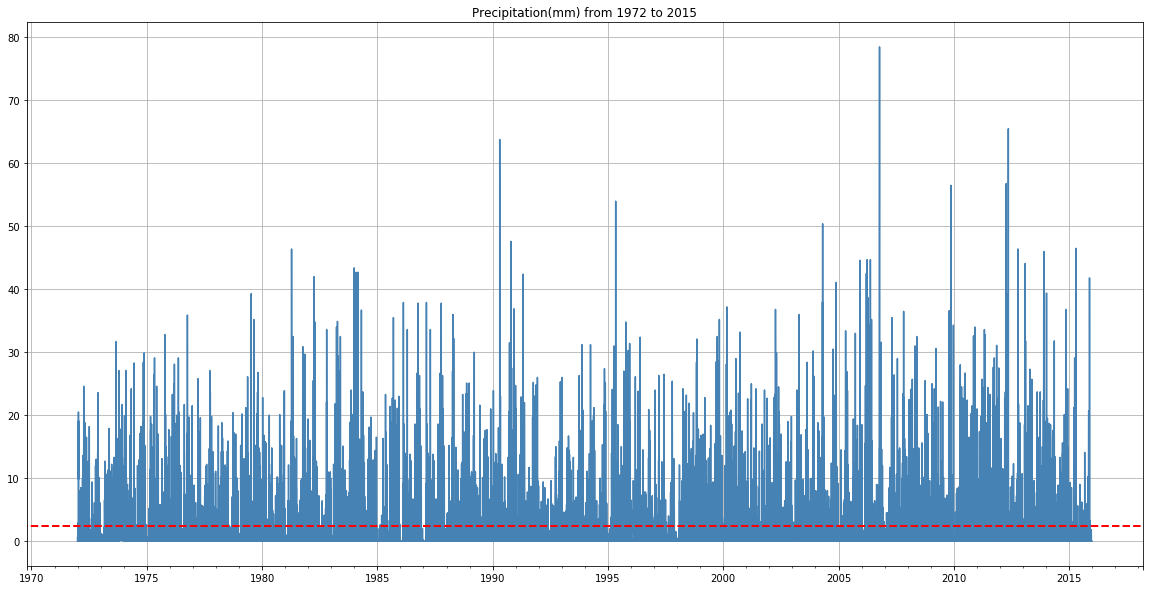

In [8]:
# Plot precipitation over a set of years.

startYear = 1972
endYear = 2015

precipitationAllTime = concatYearsPrecipitation(startYear,endYear)
meanAllTime = precipitationAllTime.mean()
ax = precipitationAllTime.plot(title='Precipitation(mm) from '+ str(startYear) +' to '+str(endYear),figsize=(20,10),grid=True,color='steelblue')
ax.axhline(y=meanAllTime, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)

# Daily Nino3.4 Index

In [9]:
########  Nino 3.4 (nino34) ##############
# https://climexp.knmi.nl/selectdailyindex.cgi?id=someone@somewhere

# Download the update dataset.
import os
if not os.path.exists('../datasets/nino34_daily.dat'):
    ! wget https://climexp.knmi.nl/data/inino34_daily.dat -O ../datasets/nino34_daily.dat

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Date','Index']

filedata = open('../datasets/nino34_daily.dat', 'r') 
nino34=pd.read_csv(StringIO('\n'.join(' '.join(l.split()) for l in filedata)),sep=' ',header=None,skiprows=lambda x: x in list(range(0,20)), names=columnNames, skipfooter=8 )

datesNino34 = pd.date_range('1981-09-10', periods=nino34.shape[0], freq='D')

nino34.index = datesNino34

nino34 = nino34.drop(['Date'], axis=1)

nino34.head(10)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


,Index
1981-09-10,-0.180247
1981-09-11,-0.049256
1981-09-12,-0.002166
1981-09-13,0.028997
1981-09-14,0.024717
1981-09-15,-0.048946
1981-09-16,-0.208084
1981-09-17,-0.309335
1981-09-18,-0.398142
1981-09-19,-0.420608


# Precipitation vs Index

Choose dates interval

In [10]:
startYear = 2000
endYear = 2015


nino34Time = nino34.loc[str(startYear)+'-01-01':str(endYear)+'-12-31']
nino34Time = nino34Time.iloc[:,0]
datesNino34All = pd.date_range(str(startYear)+'-01-01', periods=nino34Time.shape[0], freq='D')
nino34Time.index = datesNino34All

precipitationTime = precipitationAllTime.loc[str(startYear)+'-01-01':str(endYear)+'-12-31']
precipitationTime = precipitationTime.iloc[:]
datesPrecipitationAll = pd.date_range(str(startYear)+'-01-01', periods=precipitationTime.shape[0], freq='D')
precipitationTime.index = datesPrecipitationAll

Text(0,0.5,'Index Value')

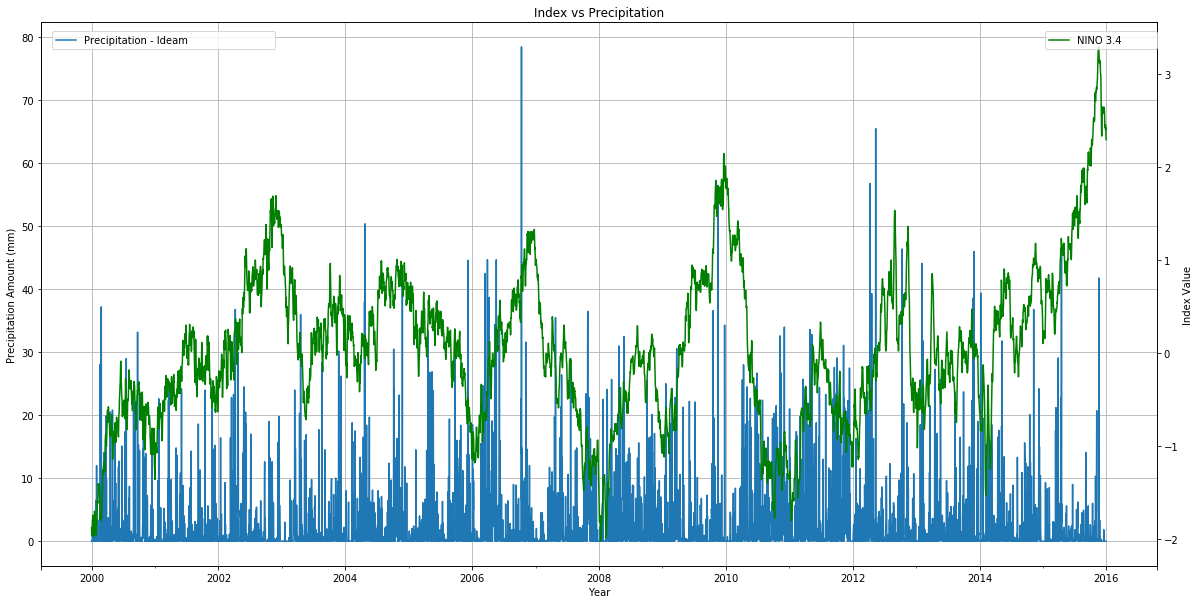

In [11]:
ax1=precipitationTime.plot(figsize=(20,10),label='Precipitation - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

nino34Time.plot(ax=ax2,color='green',label='NINO 3.4')
plt.legend(bbox_to_anchor=(0.9, 0.95, 0.1, 0.8), loc=3, ncol=2, mode="expand", borderaxespad=0.)

ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

## Dispersion Plot

The correlation matrix is:
 [[ 1.         -0.06553467]
 [-0.06553467  1.        ]]


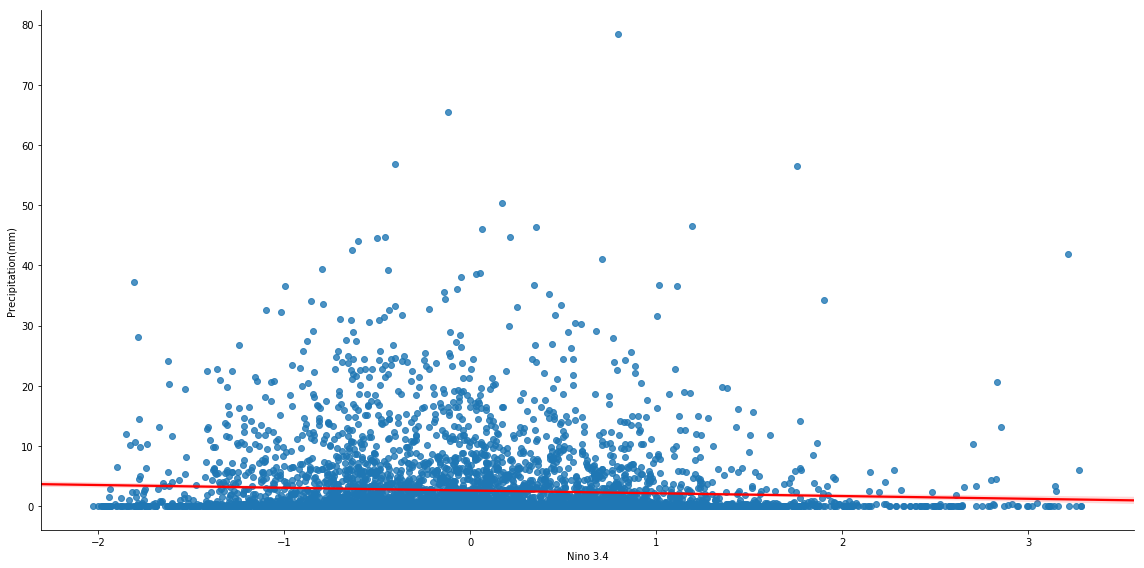

In [12]:
nino34IdeamMix = pd.concat([nino34Time,precipitationTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()

import seaborn as sns
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=8, aspect= 2, line_kws={'color': 'red'}) 

print('The correlation matrix is:\n', np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

## Box Plot 

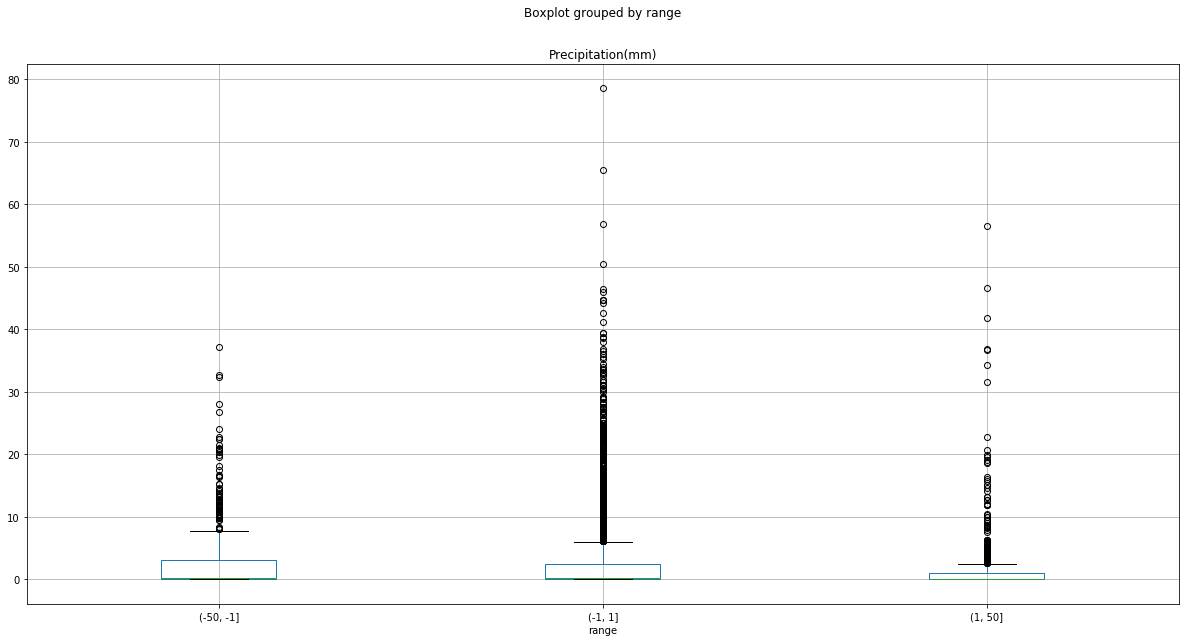

In [13]:
#Set up bins

bin = [-50,-1,1,50]

#use pd.cut function can attribute the values into its specific bins
category = pd.cut(nino34IdeamMix['Nino 3.4'],bin)

category = category.to_frame()
category.columns = ['range']

#concatenate age and its bin
nino34IdeamMix_New = pd.concat([nino34IdeamMix,category],axis = 1)

nino34IdeamMix_New.boxplot(column='Precipitation(mm)',by='range', figsize=(20,10))


# Same Analysis removing month average

In [14]:
# Calculates the month average precipitation into a interval. 

def calculateMonthMeanOverYears(startYear,endYear):
    precipitationAllTime = loadYear(startYear)
    
    for i in range(startYear+1,endYear+1):
        tempPrecipitation=loadYear(i)
               
        precipitationAllTime = pd.concat([precipitationAllTime,tempPrecipitation])     
    
    return precipitationAllTime.mean()

In [15]:
# Test the rainfall mean over all data. 

startYear = 1972
endYear = 2015

doradoMonthPrecipitationAve = calculateMonthMeanOverYears(startYear,endYear)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [16]:
# Concatenate all time series between a years range removing to all entries the month average.

def concatYearsPrecipitationRE(startYear,endYear):
    
    doradoMonthPrecipitationAve = calculateMonthMeanOverYears(startYear,endYear)
    
    precipitationAllTime = loadYear(startYear) - doradoMonthPrecipitationAve
    precipitationAllTime = convertOneYearToSeries(precipitationAllTime,startYear)
    
    for i in range(startYear+1,endYear+1):
        tempPrecipitation=loadYear(i) - doradoMonthPrecipitationAve
        tempPrecipitation= convertOneYearToSeries(tempPrecipitation,i)
        
        precipitationAllTime = pd.concat([precipitationAllTime,tempPrecipitation]) 
    
    return precipitationAllTime

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


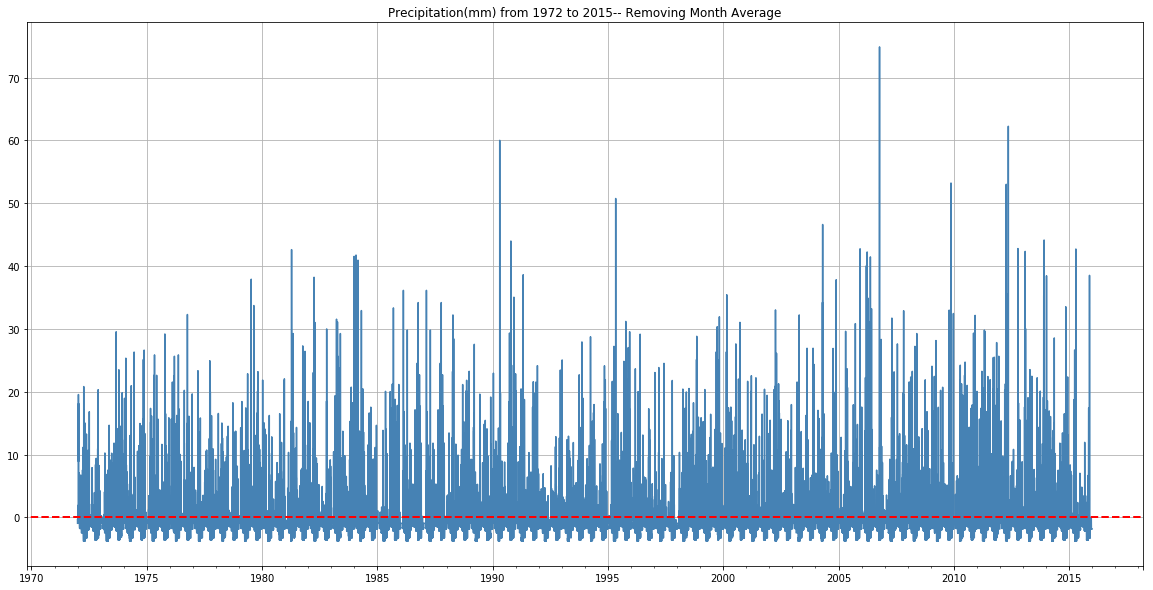

In [17]:
# Plot precipitation over a set of years.

startYear = 1972
endYear = 2015

precipitationReAllTime = concatYearsPrecipitationRE(startYear,endYear)
meanReAllTime = precipitationReAllTime.mean()
ax = precipitationReAllTime.plot(title='Precipitation(mm) from '+ str(startYear) +' to '+str(endYear)+'-- Removing Month Average',figsize=(20,10),grid=True,color='steelblue')
ax.axhline(y=meanReAllTime, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)

### Precipitation vs Index

Choose dates interval

In [18]:
startYear = 2000
endYear = 2015


nino34Time = nino34.loc[str(startYear)+'-01-01':str(endYear)+'-12-31']
nino34Time = nino34Time.iloc[:,0]
datesNino34All = pd.date_range(str(startYear)+'-01-01', periods=nino34Time.shape[0], freq='D')
nino34Time.index = datesNino34All

precipitationReTime = precipitationReAllTime.loc[str(startYear)+'-01-01':str(endYear)+'-12-31']
precipitationReTime = precipitationReTime.iloc[:]
datesPrecipitationReAll = pd.date_range(str(startYear)+'-01-01', periods=precipitationReTime.shape[0], freq='D')
precipitationReTime.index = datesPrecipitationReAll

Text(0,0.5,'Index Value')

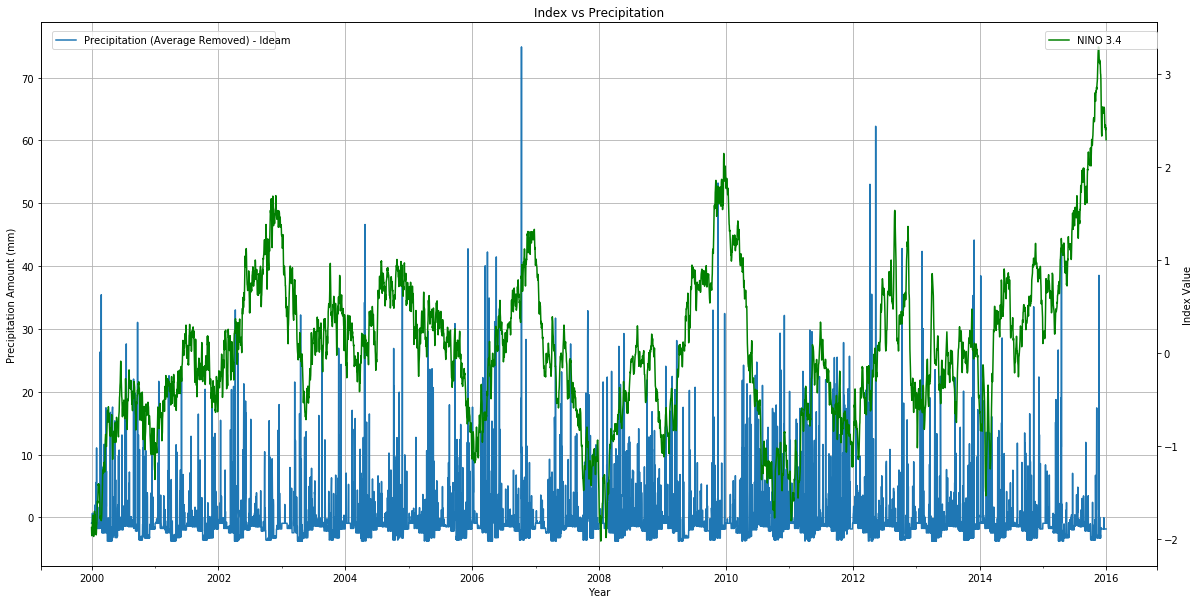

In [19]:
ax1=precipitationReTime.plot(figsize=(20,10),label='Precipitation (Average Removed) - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

nino34Time.plot(ax=ax2,color='green',label='NINO 3.4')
plt.legend(bbox_to_anchor=(0.9, 0.95, 0.1, 0.8), loc=3, ncol=2, mode="expand", borderaxespad=0.)

ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

## Dispersion Plot

The correlation matrix is:
 [[ 1.         -0.08050763]
 [-0.08050763  1.        ]]


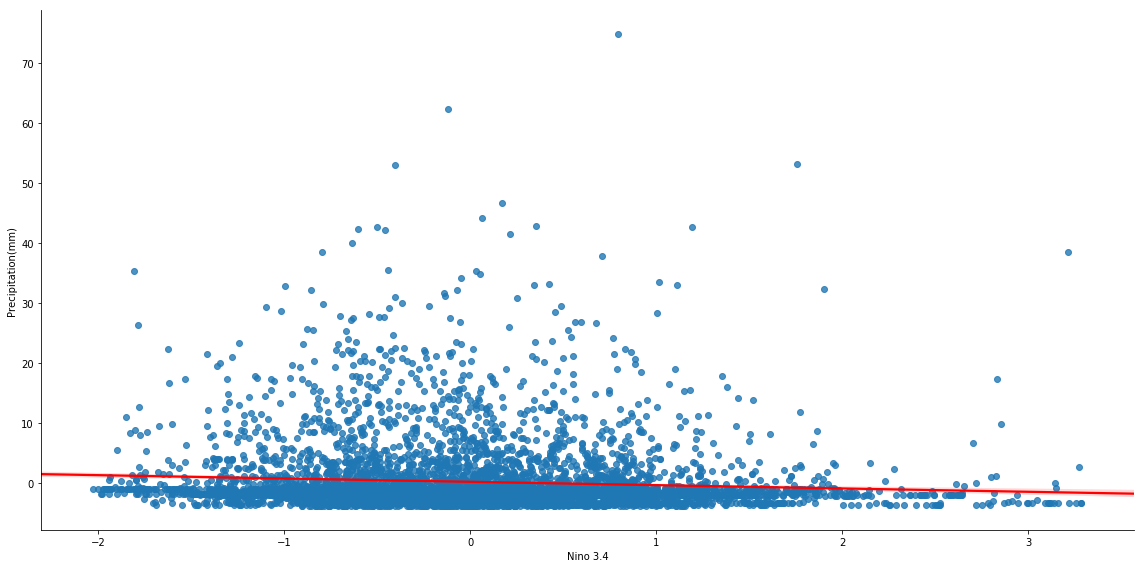

In [20]:
nino34IdeamMix = pd.concat([nino34Time,precipitationReTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()

import seaborn as sns
sns.lmplot(x='Nino 3.4',y='Precipitation(mm)',data=nino34IdeamMix,fit_reg=True, size=8, aspect= 2, line_kws={'color': 'red'}) 

print('The correlation matrix is:\n', np.corrcoef(nino34IdeamMix['Nino 3.4'],nino34IdeamMix['Precipitation(mm)']))

## Box Plot 

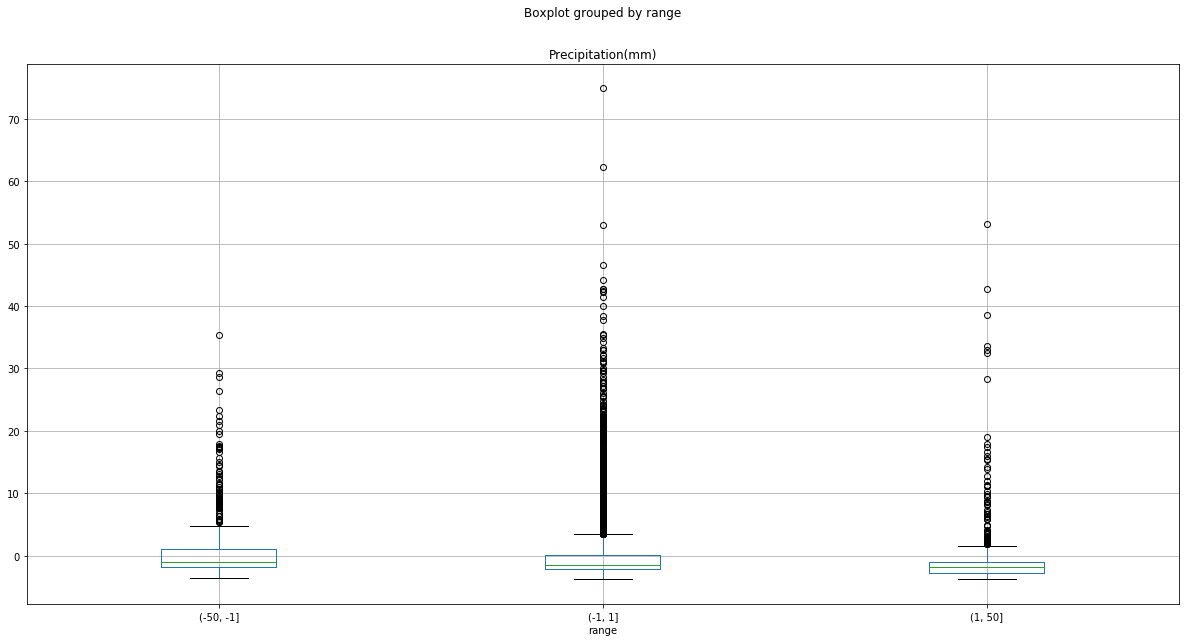

In [21]:
#Set up bins

bin = [-50,-1,1,50]

#use pd.cut function can attribute the values into its specific bins
category = pd.cut(nino34IdeamMix['Nino 3.4'],bin)

category = category.to_frame()
category.columns = ['range']

#concatenate age and its bin
nino34IdeamMix_New = pd.concat([nino34IdeamMix,category],axis = 1)

nino34IdeamMix_New.boxplot(column='Precipitation(mm)',by='range', figsize=(20,10))


# Export Ideam Data to external Files.


In [22]:
# Save precipitation data to .csv

precipitationAllTime.to_csv('../datasets/precipitationAllTime.csv')

precipitationReAllTime.to_csv('../datasets/precipitationRemovingAverageAllTime.csv')

In [23]:
precipitationAllTime

1972-01-01     0.0
1972-01-02     0.7
1972-01-03     0.0
1972-01-04     0.0
1972-01-05     0.0
1972-01-06     0.0
1972-01-07     0.0
1972-01-08     0.2
1972-01-09     2.2
1972-01-10     0.0
1972-01-11     2.4
1972-01-12     0.0
1972-01-13     2.9
1972-01-14     0.0
1972-01-15    20.5
1972-01-16     9.8
1972-01-17    19.1
1972-01-18     0.0
1972-01-19     0.6
1972-01-20     0.0
1972-01-21     0.0
1972-01-22     0.4
1972-01-23     0.0
1972-01-24     0.0
1972-01-25     0.1
1972-01-26     0.0
1972-01-27     0.0
1972-01-28     8.0
1972-01-29     5.2
1972-01-30     0.0
              ... 
2015-12-02     0.2
2015-12-03     0.2
2015-12-04     0.0
2015-12-05     0.0
2015-12-06     0.0
2015-12-07     0.0
2015-12-08     0.0
2015-12-09     0.0
2015-12-10     0.0
2015-12-11     0.0
2015-12-12     0.0
2015-12-13     0.0
2015-12-14     0.0
2015-12-15     0.0
2015-12-16     0.0
2015-12-17     0.0
2015-12-18     1.8
2015-12-19     0.0
2015-12-20     0.0
2015-12-21     0.0
2015-12-22     0.0
2015-12-23  

In [24]:
precipitationAllTime.loc['2008-12-31']

0.9